# My Version of Spotify Wrapped

### This uses my personal spotify data from March 2023 to March 2024

In [4]:
# Needed to make plotly plots show in JupyterLab
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [5]:
# All the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mplcursors
import plotly.express as px
import getpass
from datetime import date

## Import Excel data

In [6]:
df = pd.read_excel('data/StreamingHistory0.json.xlsx', index_col = 0)
df

,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
endTime,,,,,,,,
2023-03-01 00:02,2023-03-01,Wed,00:02,J. Cole,False Prophets,237426,3.957100,Yes
2023-03-01 00:12,2023-03-01,Wed,00:12,Mac Miller,Cinderella (feat. Ty Dolla $ign),2376,0.039600,No
2023-03-01 01:10,2023-03-01,Wed,01:10,RM,"Closer (with Paul Blanco, Mahalia)",50282,0.838033,No
2023-03-01 01:14,2023-03-01,Wed,01:14,TOMORROW X TOGETHER,CROWN,230706,3.845100,Yes
2023-03-01 01:18,2023-03-01,Wed,01:18,THE BOYZ,Giddy Up,1184,0.019733,No
...,...,...,...,...,...,...,...,...
2024-03-01 20:40,2024-03-01,Fri,20:40,Hayley Kiyoko,Sleepover,1927,0.032117,No
2024-03-01 20:40,2024-03-01,Fri,20:40,Shawn Mendes,Lost In Japan,2252,0.037533,No
2024-03-01 20:44,2024-03-01,Fri,20:44,Tove Lo,True Disaster,4551,0.075850,No


The data started off with only 5 columns. I deleted one that didn't give any useful information and I was left with endTime, artistName, trackName, and msPlayed. I added date, wkday, and time based off of the information from endTime. Then minsPlayed was added based off of msPlayed, and lastly Inlcude Song was added to see if the minutes the song was played was either either above (Yes) or below (No) 2 minutes. All of these changes were made in excel.

In [7]:
# Removing songs that weren't listened to for long enough to include
skippedsongs = df[ df['Include Song'] == "No" ].index
df.drop(skippedsongs, inplace = True)

In [8]:
# New data without the songs listened to for <2 mins
df

,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
endTime,,,,,,,,
2023-03-01 00:02,2023-03-01,Wed,00:02,J. Cole,False Prophets,237426,3.957100,Yes
2023-03-01 01:14,2023-03-01,Wed,01:14,TOMORROW X TOGETHER,CROWN,230706,3.845100,Yes
2023-03-01 01:20,2023-03-01,Wed,01:20,NCT U,Light Bulb,142683,2.378050,Yes
2023-03-01 18:14,2023-03-01,Wed,18:14,THE BOYZ,Giddy Up,216947,3.615783,Yes
2023-03-01 18:17,2023-03-01,Wed,18:17,VIXX,Shangri-La,202268,3.371133,Yes
...,...,...,...,...,...,...,...,...
2024-03-01 00:47,2024-03-01,Fri,00:47,Arcángel,La Jumpa,255693,4.261550,Yes
2024-03-01 00:52,2024-03-01,Fri,00:52,KAROL G,QLONA,172797,2.879950,Yes
2024-03-01 00:56,2024-03-01,Fri,00:56,Zion & Lennox,Yo Voy (feat. Daddy Yankee),232019,3.866983,Yes


In [9]:
# Value count of each variable in each column
df.count()

date            5563
wkday           5563
time            5563
artistName      5563
trackName       5563
msPlayed        5563
minsPlayed      5563
Include Song    5563
dtype: int64

In [10]:
# Shape of the dataset (rows, cols)
print(df.shape)

(5563, 8)


# Goal: What day of the week are songs streamed most?

In [11]:
# Select columns
df[['date', 'wkday', 'minsPlayed']]

,date,wkday,minsPlayed
endTime,,,
2023-03-01 00:02,2023-03-01,Wed,3.957100
2023-03-01 01:14,2023-03-01,Wed,3.845100
2023-03-01 01:20,2023-03-01,Wed,2.378050
2023-03-01 18:14,2023-03-01,Wed,3.615783
2023-03-01 18:17,2023-03-01,Wed,3.371133
...,...,...,...
2024-03-01 00:47,2024-03-01,Fri,4.261550
2024-03-01 00:52,2024-03-01,Fri,2.879950
2024-03-01 00:56,2024-03-01,Fri,3.866983


In [12]:
# Assign variable for order of weekdays for visual purposes
day = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

In [13]:
# Count minutes played for each day of the week
mins = df.groupby('wkday')['minsPlayed'].sum().reindex(day)
mins

wkday
Sun      1548.573633
Mon      2572.431500
Tues     2719.567283
Wed      3296.436383
Thurs    2394.369300
Fri      2398.260233
Sat      3370.273317
Name: minsPlayed, dtype: float64

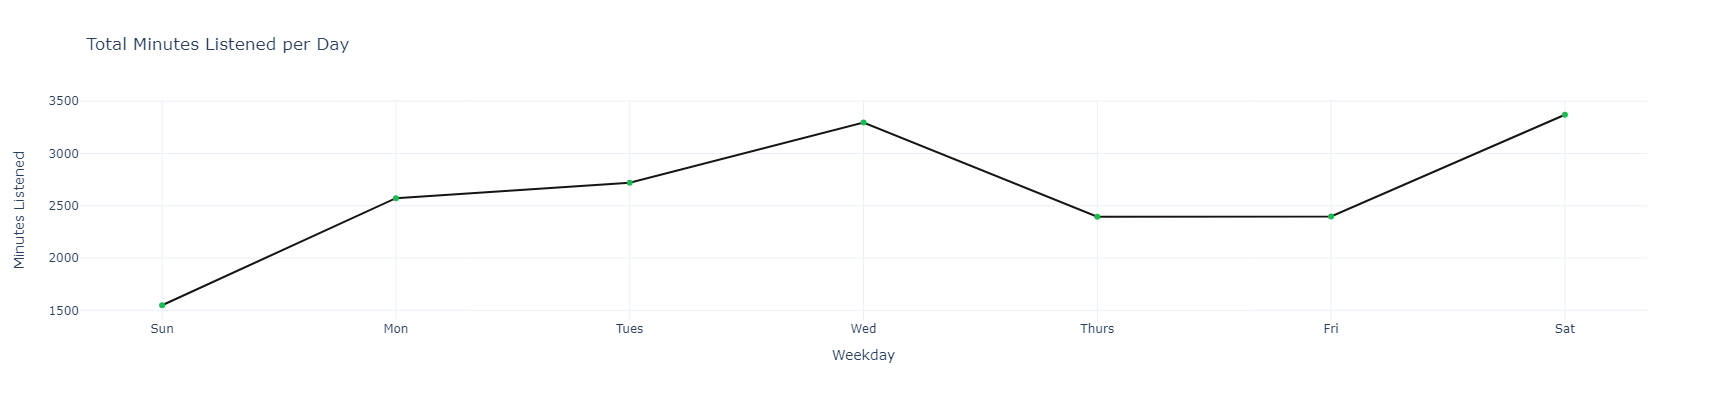

In [14]:
# Create graph to display minutes listened for each day
fig = px.line(df.groupby('wkday')['minsPlayed'].sum().reindex(day), 
                 labels={'index': 'Day', 'value': 'Minutes Listened'},
                 title='Total Minutes Listened per Day',
                 color_discrete_sequence=['Green'],
                 template='plotly_white', 
                 markers=True)  # Use a white background template
fig.update_layout(xaxis_title='Weekday', height=400, width=800, showlegend=False)
fig.update_traces(line_color='#191414', marker_color='#1DB954', hovertemplate='Minutes: %{y}<br>Day: %{x}')
fig.show()

Findings: We can see that my most litened to days were Wednesday and Saturday. It seems that my music listening peaked during the middle of the week and at the beginning of the weekend. 

# Goal: Top 10 Most Streamed Songs

In [15]:
# See number of times each track appears in the dataset
pd.Series(df['trackName']).value_counts()

trackName
Fantasmas                  25
WHERE SHE GOES             24
BESO                       21
un x100to                  19
CORAZÓN VACÍO              19
                           ..
Icon                        1
J'ai encore rêvé de toi     1
Ass propos                  1
sisyphe                     1
Vacation (Feat. SOLE)       1
Name: count, Length: 2652, dtype: int64

In [16]:
# Display only the first 10 tracks in the "trackName" column
pd.Series(df['trackName']).value_counts().head(10)

trackName
Fantasmas                                25
WHERE SHE GOES                           24
BESO                                     21
un x100to                                19
CORAZÓN VACÍO                            19
Shakira: Bzrp Music Sessions, Vol. 53    19
TQG                                      18
Bonnie & Clyde                           17
EVITA!                                   16
Nonsense                                 16
Name: count, dtype: int64

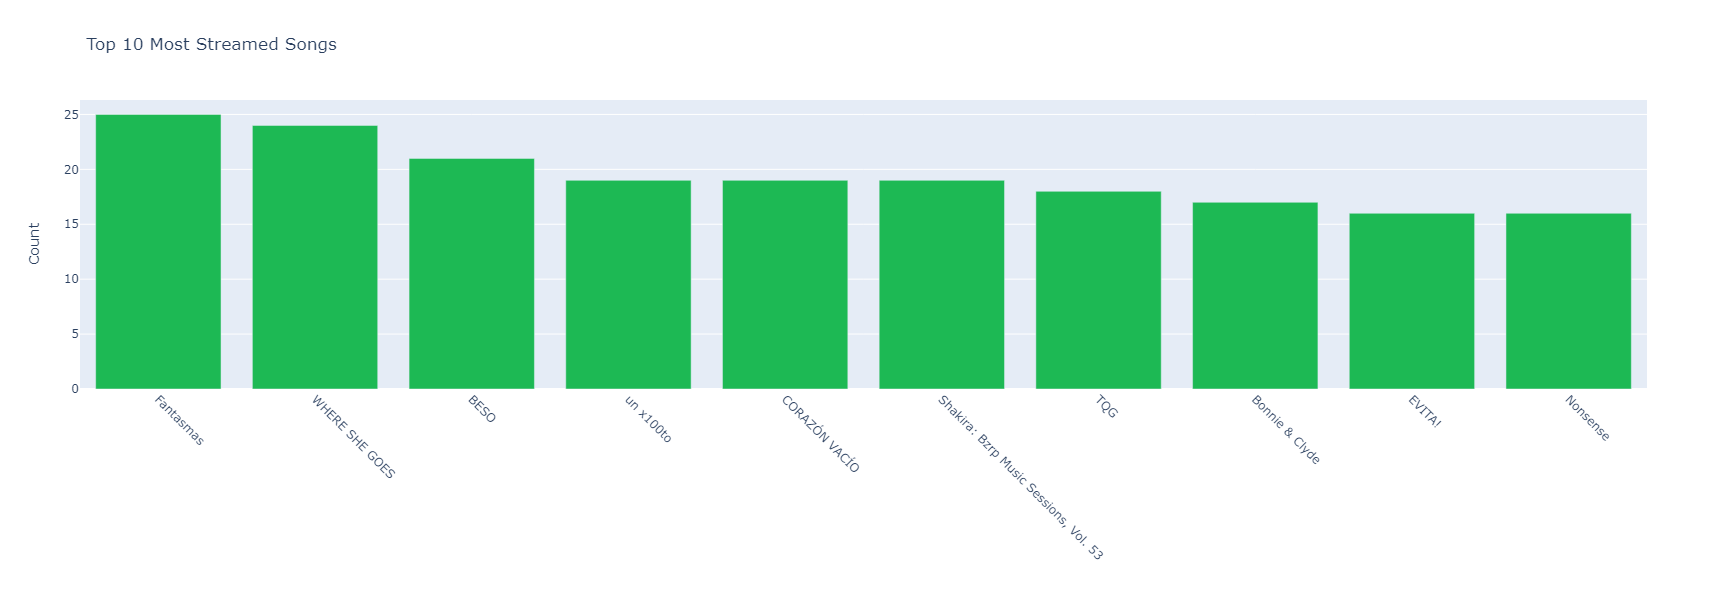

In [17]:
# Create a bar graph to show my top 10 played songs and the number of times I listened to them
fig = px.bar(df['trackName'].value_counts().head(10), title='Top 10 Most Streamed Songs')
fig.update_xaxes(tickangle=45, tickmode='array', tickvals=df['trackName'].value_counts().head(10).index, ticktext=df['trackName'].value_counts().head(10).index)
fig.update_layout(yaxis_title='Count', height=600, width=800, showlegend=False, xaxis_title='')
fig.update_traces(marker_color='#1DB954', hovertemplate='Count: %{y}<br>Song: %{x}')
fig.show()

Findings: My most listened to song was 'Fantasmas' by Ambar Lucid<br>
Based off this graph I can see that I should look into more Latin songs and artists since those are the songs I seem to listen to the most

# Goal: Top 20 Most Streamed Artists

In [18]:
# Count how many times I listened to individual artists
pd.Series(df['artistName']).value_counts()

artistName
BTS                    125
SEVENTEEN              120
TOMORROW X TOGETHER    109
DeVita                  86
Stray Kids              81
                      ... 
Big K.R.I.T.             1
My Chemical Romance      1
Sad Night Dynamite       1
Wolpis Carter            1
Gaeko                    1
Name: count, Length: 1145, dtype: int64

In [19]:
# Show my top 20 most listened to artists
pd.Series(df['artistName']).value_counts().head(20)

artistName
BTS                    125
SEVENTEEN              120
TOMORROW X TOGETHER    109
DeVita                  86
Stray Kids              81
NewJeans                73
KAROL G                 65
Red Velvet              57
Bad Bunny               55
DAY6                    53
Ariana Grande           52
FLO                     49
Conan Gray              49
Troye Sivan             48
KATIE                   48
ROSALÍA                 45
AKMU                    44
NCT 127                 43
Ambar Lucid             43
EXO                     43
Name: count, dtype: int64

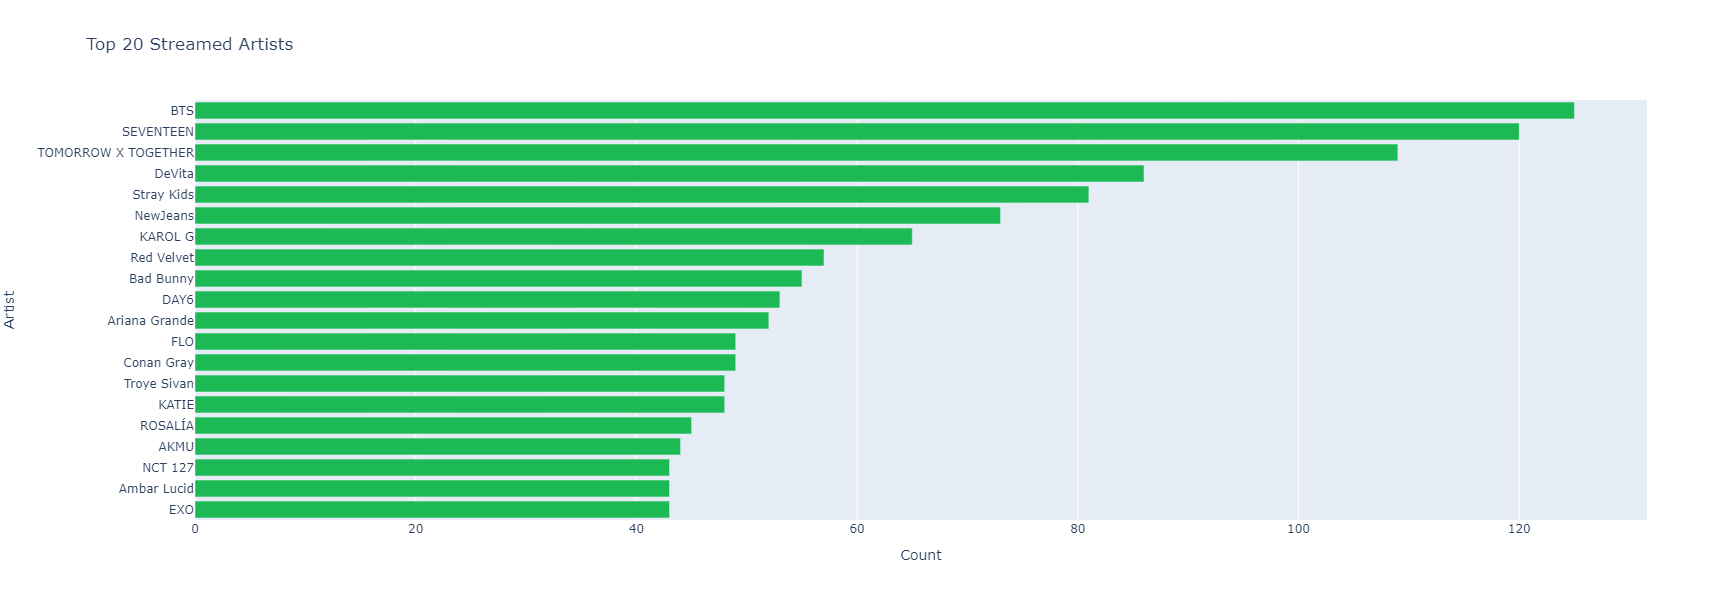

In [20]:
# Create a horizontal bar graph to display my top 20 artists and the number of times I listened to them
fig = px.bar(df['artistName'].value_counts().head(20), orientation='h', title='Top 20 Streamed Artists',
             labels={'index': 'Artists', 'value': 'Count'})
fig.update_layout(yaxis={'autorange': 'reversed'}, yaxis_title='Artist', height=600, width=800, showlegend=False, xaxis_title='Count')
fig.update_traces(marker_color='#1DB954', hovertemplate='Count: %{y}<br>Artist: %{x}')
fig.show()

Findings: 'BTS' is my most listened to artist<br>I find this really interesting because there are no songs from 'BTS' in my most Top 10 Most Listened to Songs<br>
My 'Top 10 Songs' are mostly Latin artists but my 'Top 20 Artists' are mostly K-Pop artists<br>I must listen to a wider variety of songs from K-Pop artists while I only listen to specific songs from Latin artists

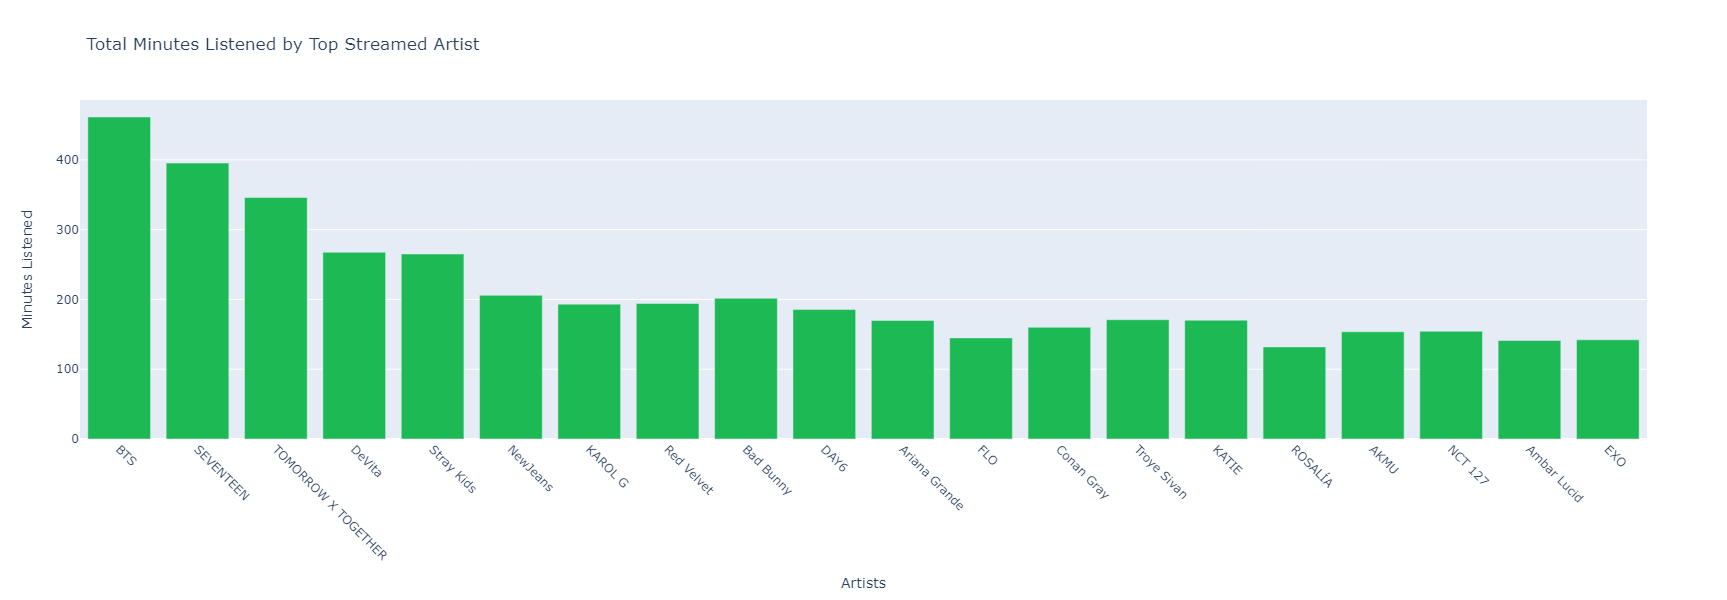

In [21]:
# Create list of top 20 artists
sorted_artists = df['artistName'].value_counts().head(20).index.tolist()

# Plot as a bar graph
fig = px.bar(df[df['artistName'].isin(sorted_artists)].groupby('artistName')['minsPlayed'].sum().loc[sorted_artists], 
             labels={'artistName': 'Artists', 'value': 'Minutes Listened'},
             title='Total Minutes Listened by Top Streamed Artist')
fig.update_layout(xaxis_title='Artists', yaxis_title='Minutes Listened', height=600, width=800, showlegend=False)
fig.update_traces(marker_color='#1DB954', hovertemplate='Minutes: %{y}<br>Artist: %{x}')
fig.update_xaxes(tickangle=45, tickmode='array')
fig.show()

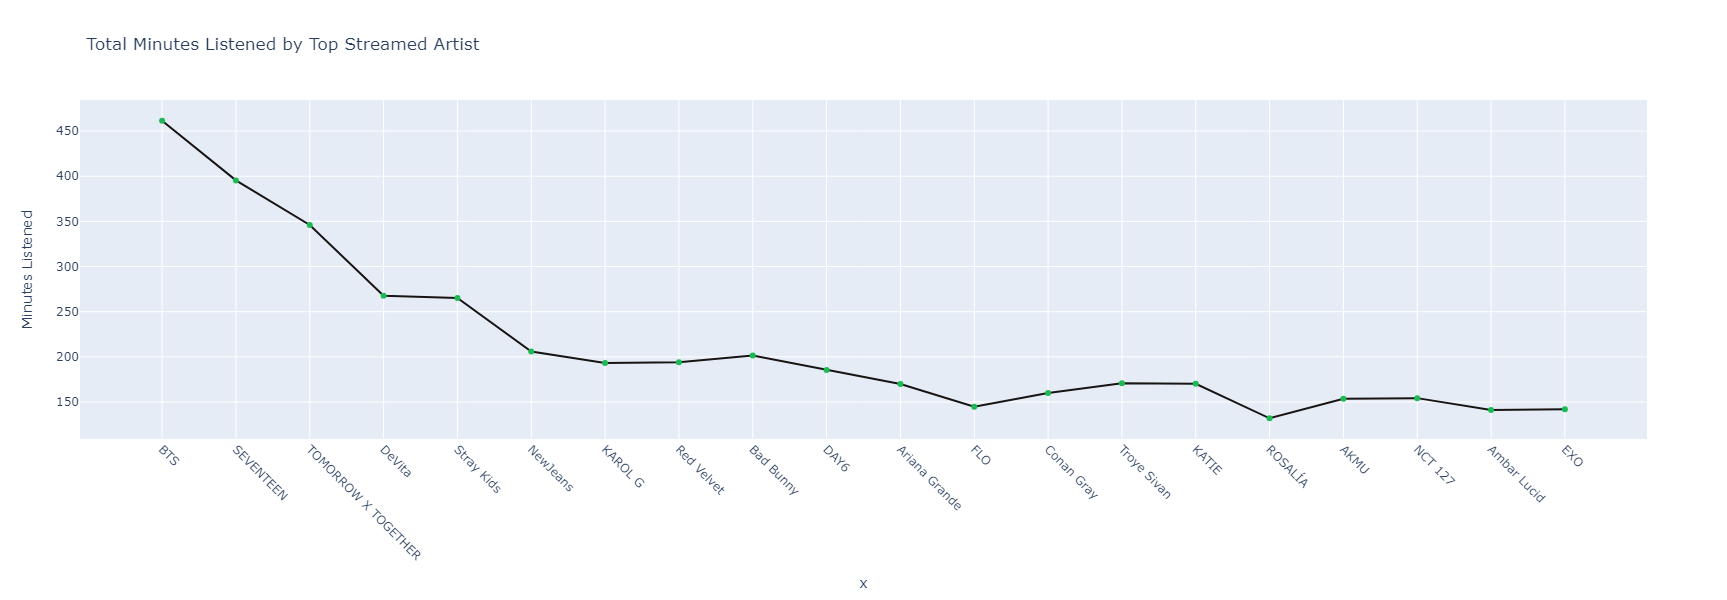

In [22]:
# Filter data for the top 20 artists
top_artists_data = df[df['artistName'].isin(sorted_artists)]

# Aggregate data by artist and sum minutes played
min_artist = top_artists_data.groupby('artistName')['minsPlayed'].sum().loc[sorted_artists]

# Plot as a line graph
fig = px.line(x=min_artist.index, y=min_artist.values, title='Total Minutes Listened by Top Streamed Artist', markers=True)
fig.update_traces(line_color='#191414', marker_color='#1DB954', hovertemplate='Minutes: %{y}<br>Day: %{x}')
fig.update_layout(xaxis=dict(tickangle=45, tickmode='array'), yaxis_title='Minutes Listened', height=600, width=800, showlegend=False)
fig.show()

# What are my top 10 most listened to genres?

Use Spotify API to find the genre of the artists I have listened to and find my top 10 genres

In [23]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [37]:
# Initialize the Spotipy client
# Input client id and then client secret when this cell is run
CLIENT_ID = getpass.getpass()
CLIENT_SECRET = getpass.getpass()
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

 ········
 ········


In [25]:
# Get unique artist names
unique_artist_names = df['artistName'].unique()

# Get genres for each unique artist
artist_genres = {}
for artist_name in unique_artist_names:
    results = sp.search(q='artist:' + artist_name, type='artist', limit=1)
    if results['artists']['items']:
        artist_id = results['artists']['items'][0]['id']
        artist_info = sp.artist(artist_id)
        artist_genres[artist_name] = artist_info['genres'] if artist_info['genres'] else None

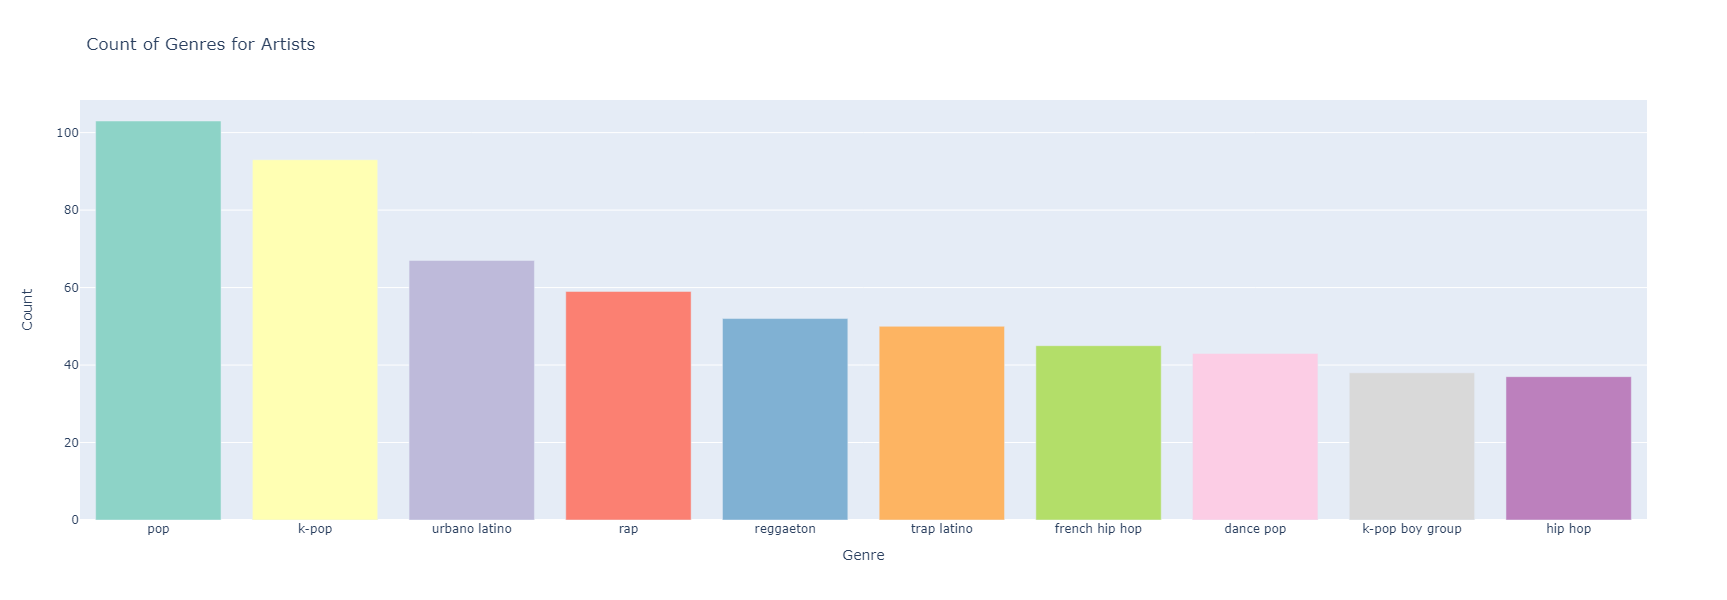

In [26]:
artist_genres_filtered = {k: v for k, v in artist_genres.items() if v}

# Flatten the genres list
genres_flat = [genre for sublist in artist_genres_filtered.values() for genre in sublist]

# Create a DataFrame with the flattened genres
df_genres = pd.DataFrame(genres_flat, columns=['genre'])

# Group by genre and count the occurrences
genre_counts = df_genres['genre'].value_counts().reset_index().head(10)
genre_counts.columns = ['genre', 'count']

# Create a Plotly bar graph
fig = px.bar(genre_counts, x='genre', y='count', color='genre',
             title='Count of Genres for Artists',
             labels={'genre': 'Genre', 'count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

# Goal: How many songs are on each playlist?

In [27]:
# Upload playlist dataset (no changes made in excel)
playlists = pd.read_excel('C:/Users/pjsol/Downloads/Playlist1.json.xlsx')
playlists

,playlists,name,lastModifiedDate,items,track,trackName,artistName,albumName,trackUri,episode,localTrack,addedDate,description,numberOfFollowers
0,NaN,português,2024-02-28,NaN,NaN,Seja Agora,Monique Kessous,Dentro de Mim Cabe o Mundo,spotify:track:2rPTHxU7nJJxPkVM5Qnd2U,NaN,NaN,2024-02-28,NaN,0.0
1,NaN,karaoke songs,2024-01-09,NaN,NaN,Remember,KATIE,Remember,spotify:track:0GIsLh8ly8RuFc2pZshRPl,NaN,NaN,2024-01-09,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,3D (feat. Jack Harlow),Jung Kook,3D (feat. Jack Harlow),spotify:track:6ehWdR7cGDXnT7aKEASJxE,NaN,NaN,2024-01-09,NaN,NaN
3,NaN,Sing it!,2023-03-02,NaN,NaN,Yo Perreo Sola,Bad Bunny,YHLQMDLG,spotify:track:0SqqAgdovOE24BzxIClpjw,NaN,NaN,2023-03-02,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,Fantasmas,Ambar Lucid,Garden of Lucid,spotify:track:0itukH4hI1pxOsyRQRQ28f,NaN,NaN,2023-03-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,NaN,NaN,NaN,NaN,NaN,Ce Soir,Duckwrth,Ce Soir,spotify:track:207wpnoruEx0FoLj2Z8cQj,NaN,NaN,2022-08-09,NaN,NaN
2910,NaN,NaN,NaN,NaN,NaN,LORD FORGIVE ME,Tobe Nwigwe,LORD FORGIVE ME,spotify:track:3PnDz7t38mzVZaImRrSknW,NaN,NaN,2022-08-09,NaN,NaN
2911,NaN,NaN,NaN,NaN,NaN,on the street (with J. Cole),j-hope,on the street (with J. Cole),spotify:track:5wxYxygyHpbgv0EXZuqb9V,NaN,NaN,2023-04-17,NaN,NaN
2912,NaN,NaN,NaN,NaN,NaN,All My Life (feat. J. Cole),Lil Durk,Almost Healed,spotify:track:6T7FXSuXykeGktMLGp8WgE,NaN,NaN,2023-06-30,NaN,NaN


In [28]:
# Value count of each variable in each column
playlists.count()

playlists               0
name                   10
lastModifiedDate       10
items                   0
track                   0
trackName            2914
artistName           2914
albumName            2914
trackUri             2914
episode                 0
localTrack              0
addedDate            2914
description             1
numberOfFollowers      10
dtype: int64

In [29]:
# Remove columns with no information
playlists = playlists.drop(['playlists', 
                            'items', 'track', 'episode', 'trackUri', 'localTrack', 'description', 'numberOfFollowers'], axis = 1)
playlists.count()

name                  10
lastModifiedDate      10
trackName           2914
artistName          2914
albumName           2914
addedDate           2914
dtype: int64

In [30]:
# Print the column names
for col in playlists.columns:
    print(col)

name
lastModifiedDate
trackName
artistName
albumName
addedDate


In [31]:
playlists

,name,lastModifiedDate,trackName,artistName,albumName,addedDate
0,português,2024-02-28,Seja Agora,Monique Kessous,Dentro de Mim Cabe o Mundo,2024-02-28
1,karaoke songs,2024-01-09,Remember,KATIE,Remember,2024-01-09
2,NaN,NaN,3D (feat. Jack Harlow),Jung Kook,3D (feat. Jack Harlow),2024-01-09
3,Sing it!,2023-03-02,Yo Perreo Sola,Bad Bunny,YHLQMDLG,2023-03-02
4,NaN,NaN,Fantasmas,Ambar Lucid,Garden of Lucid,2023-03-02
...,...,...,...,...,...,...
2909,NaN,NaN,Ce Soir,Duckwrth,Ce Soir,2022-08-09
2910,NaN,NaN,LORD FORGIVE ME,Tobe Nwigwe,LORD FORGIVE ME,2022-08-09
2911,NaN,NaN,on the street (with J. Cole),j-hope,on the street (with J. Cole),2023-04-17
2912,NaN,NaN,All My Life (feat. J. Cole),Lil Durk,Almost Healed,2023-06-30


In [32]:
# Replace null (NaN) values with playlist names until it changes to the next one
playlists['name'] = playlists.name.replace(r'^\s*$', np.nan, regex = True).ffill()
playlists['name']

0              português
1          karaoke songs
2          karaoke songs
3               Sing it!
4               Sing it!
              ...       
2909    Chris Rap Attack
2910    Chris Rap Attack
2911    Chris Rap Attack
2912    Chris Rap Attack
2913    Chris Rap Attack
Name: name, Length: 2914, dtype: object

In [33]:
playlists

,name,lastModifiedDate,trackName,artistName,albumName,addedDate
0,português,2024-02-28,Seja Agora,Monique Kessous,Dentro de Mim Cabe o Mundo,2024-02-28
1,karaoke songs,2024-01-09,Remember,KATIE,Remember,2024-01-09
2,karaoke songs,NaN,3D (feat. Jack Harlow),Jung Kook,3D (feat. Jack Harlow),2024-01-09
3,Sing it!,2023-03-02,Yo Perreo Sola,Bad Bunny,YHLQMDLG,2023-03-02
4,Sing it!,NaN,Fantasmas,Ambar Lucid,Garden of Lucid,2023-03-02
...,...,...,...,...,...,...
2909,Chris Rap Attack,NaN,Ce Soir,Duckwrth,Ce Soir,2022-08-09
2910,Chris Rap Attack,NaN,LORD FORGIVE ME,Tobe Nwigwe,LORD FORGIVE ME,2022-08-09
2911,Chris Rap Attack,NaN,on the street (with J. Cole),j-hope,on the street (with J. Cole),2023-04-17
2912,Chris Rap Attack,NaN,All My Life (feat. J. Cole),Lil Durk,Almost Healed,2023-06-30


In [34]:
# Show the unique playlist names (no duplicates)
playlists['name'].unique()

array(['português', 'karaoke songs', 'Sing it!', '음악', 'música', 'Musik',
       'Ruthless', 'Chris French', 'Chris Chill', 'Chris Rap Attack'],
      dtype=object)

In [35]:
# Count of songs in each playlist
pd.Series(playlists['name']).value_counts()

name
Chris Rap Attack    1353
음악                   627
Chris Chill          567
Chris French         283
música                31
Musik                 29
Ruthless              15
Sing it!               6
karaoke songs          2
português              1
Name: count, dtype: int64

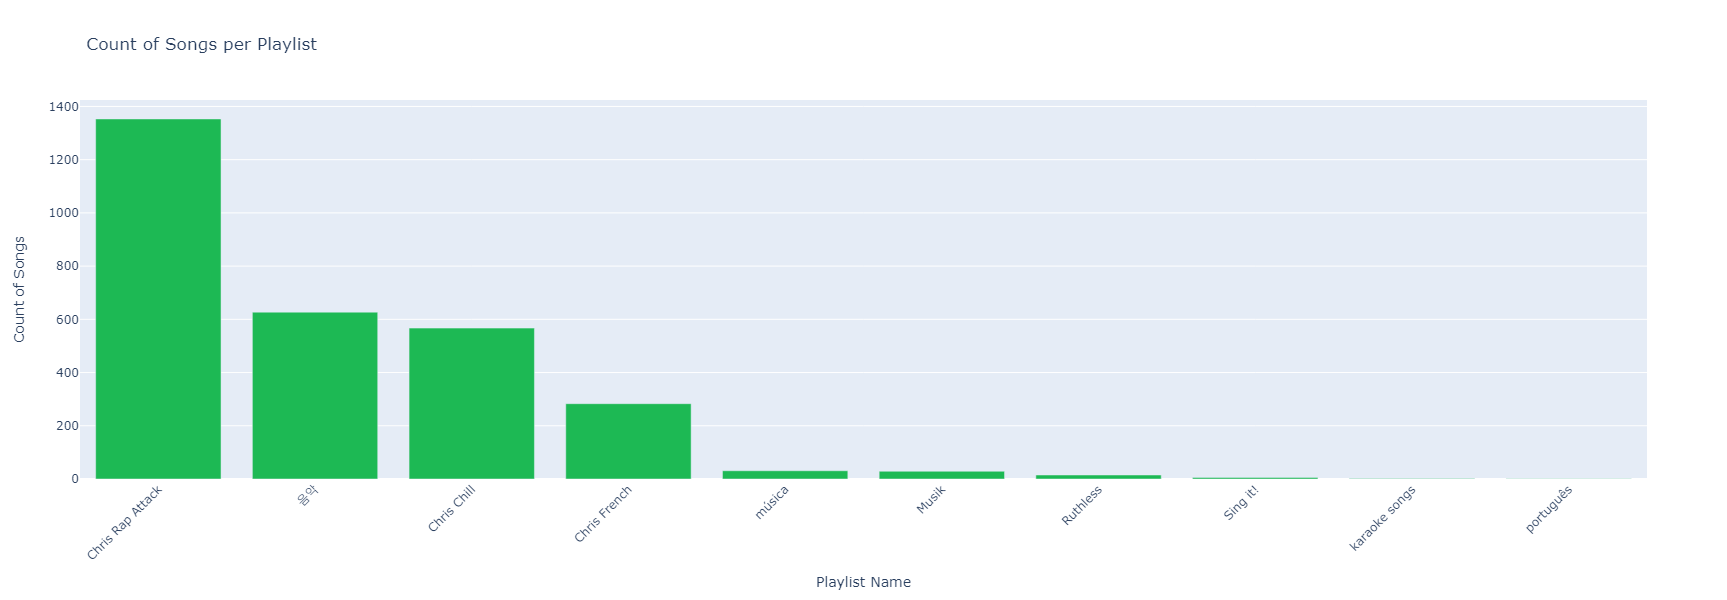

In [36]:
# Create a bar graph that shows the count of songs on each playlist
fig = px.bar(playlists['name'].value_counts(),
             labels={'index': 'Playlist Name', 'value': 'Count'},
             title='Count of Songs per Playlist')
fig.update_layout(xaxis_title='Playlist Name', yaxis_title='Count of Songs', xaxis_tickangle=-45, height=600, width=800, showlegend=False)
fig.update_traces(marker_color='#1DB954', hovertemplate='Count: %{y}<br>Playlist: %{x}')
fig.show()

Findings: The playlists starting with Chris are my brother's playlists and the rest are mine<br>We can clearly see that his playlists have far more songs in them than my do<br>
The reason for this is because most of my music just goes into Liked Songs or is sorted by language, like '음악' which is my korean music playlist